<span style="color: purple">

Load in stored variables:

</span>

In [2]:
%store -r data_dir sites_gdf siskiyou_forest_gdf padres_forest_gdf
%store -r siskiyou_soil_ph_da padres_soil_ph_da
%store -r siskiyou_srtm_da padres_srtm_da
%store -r ave_annual_pr_das_list climate_df_list

<span style="color: purple">

Import packages:

</span>

In [3]:
# Import necessary packages
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import rioxarray as rxr # Work with raster data
import xarray as xr # Work with DataArrays

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

<span style='color:purple'>

Crop DataArrays:

</span>

In [11]:
# add names to soil and elevation DataArrays
siskiyou_soil_ph_da.name = 'Siskiyou Soil pH'
siskiyou_srtm_da.name = 'Siskiyou Elevation (m)'
padres_soil_ph_da.name = 'Los Padres Soil pH'
padres_srtm_da.name = 'Los Padres Elevation (m)'

In [12]:
# create a list of all DataArrays
das_list = [
    siskiyou_soil_ph_da,
    siskiyou_srtm_da,
    padres_soil_ph_da,
    padres_srtm_da,
    ave_annual_pr_das_list[0],
    ave_annual_pr_das_list[1],
    ave_annual_pr_das_list[2],
    ave_annual_pr_das_list[3],
    ave_annual_pr_das_list[4],
    ave_annual_pr_das_list[5],
    ave_annual_pr_das_list[6],
    ave_annual_pr_das_list[7],
    ave_annual_pr_das_list[8],
    ave_annual_pr_das_list[9],
    ave_annual_pr_das_list[10],
    ave_annual_pr_das_list[11],
    ave_annual_pr_das_list[12],
    ave_annual_pr_das_list[13],
    ave_annual_pr_das_list[14],
    ave_annual_pr_das_list[15]
    ]

In [13]:
# Define siskiyou bounds
siskiyou_bounds = tuple(siskiyou_forest_gdf.total_bounds)

# Add buffer to siskiyou bounds
buffer = .025
siskiyou_xmin, siskiyou_ymin, siskiyou_xmax, siskiyou_ymax = siskiyou_bounds
siskiyou_bounds_buffer = (siskiyou_xmin-buffer,
                          siskiyou_ymin-buffer,
                          siskiyou_xmax+buffer,
                          siskiyou_ymax+buffer)

# Define padres bounds
padres_bounds = tuple(padres_forest_gdf.total_bounds)

# Add .025 buffer to bounds
c_xmin, c_ymin, c_xmax, c_ymax = padres_bounds
padres_bounds_buffer = (c_xmin-buffer,
                        c_ymin-buffer,
                        c_xmax+buffer,
                        c_ymax+buffer)

<span style="color: purple">

All DataArrays will be reprojected to the soil pH DataArrays since they have a 30 meter resolution. The SRTM DataArrays also have a 30 m resolution, however I will reproject them as well for consistency.

Resolutions:

* Soil data - 30 m resolution

* SRTM data - 30 m resolution

* MACA Climate data - either [4 or 6 km](https://climate.northwestknowledge.net/MACA/gallery_info.php)

### Reproject SRTM DataArrays to the soil pH DataArrays
</span>

In [14]:
# see what bounds of some of the DataArrays are before reprojecting and matching
print(siskiyou_soil_ph_da.rio.bounds())
print(siskiyou_srtm_da.rio.bounds())
print(ave_annual_pr_das_list[0].rio.bounds())

print(padres_soil_ph_da.rio.bounds())
print(padres_srtm_da.rio.bounds())
print(ave_annual_pr_das_list[8].rio.bounds())

(-124.41638888889439, 41.88055555556612, -123.30833333334934, 42.886666666667736)
(-124.44152777777778, 41.855138888888874, -123.28347222222224, 42.91152777777778)
(-124.4180042560284, 41.8753080368042, -123.29300953791692, 42.916958808898926)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)
(-121.87430555555555, 34.36625, -118.71763888888896, 36.42930555555556)
(-121.87637807210287, 34.3754301071167, -118.70975779215495, 36.41706562042236)


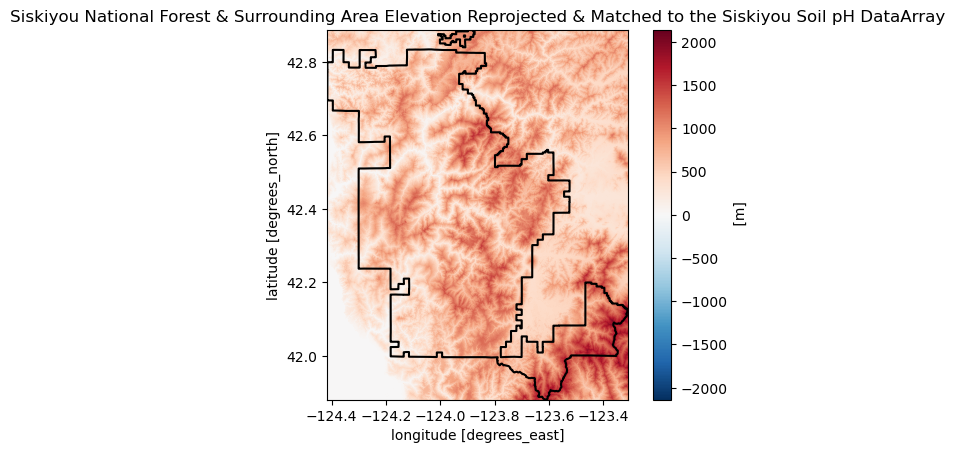

In [4]:
# Reproject and match siskiyou_srtm_da to the siskiyou_soil_ph_da
siskiyou_elev_reproj_da = (siskiyou_srtm_da
                              .rio.reproject_match(siskiyou_soil_ph_da))
siskiyou_elev_reproj_da.plot()

# Plot Siskiyou National Forest boundary on siskiyou_elev_reproj_da plot
siskiyou_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Siskiyou National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()

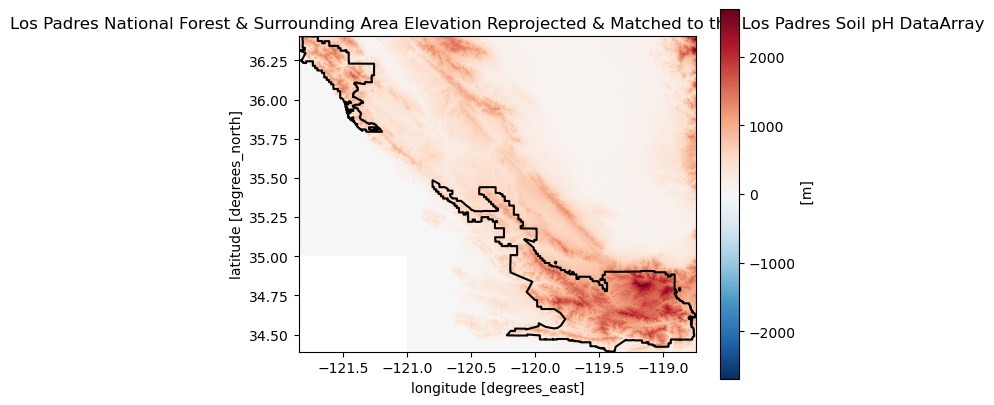

In [5]:
# Reproject and match padres_srtm_da to the padres_soil_ph_da
padres_elev_reproj_da = (padres_srtm_da
                              .rio.reproject_match(padres_soil_ph_da))
padres_elev_reproj_da.plot()

# Plot Los Padres National Forest boundary on padres_elev_reproj_da plot
padres_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Los Padres National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Los Padres Soil pH DataArray')
plt.show()

<span style='color:purple'>

### Reproject MACA Climate DataArrays to the soil pH DataArrays

MACA Climate DataArrays are in this list: ave_annual_pr_das_list

There are 16 DataArrays in the list

Each needs to be reprojected -> loop

</span>

In [22]:
# empty list for reprojected DataArrays
reproj_das_list = []

# for each DataArray in das_list,
for da in das_list:
    # if 'Siskiyou' is in the name of the DataArray
    if 'Siskiyou' in da.name:
        # crop the da
        s_cropped_da = da.rio.clip_box(*siskiyou_bounds_buffer)
        # reproject and match the cropped DataArray to the siskiyou_soil_ph_da
        s_reproj_da = (s_cropped_da.rio.reproject_match(siskiyou_soil_ph_da))
        # add reproj_da to the reproj_ave_annual_pr_das list
        reproj_das_list.append(s_reproj_da)
    if 'Padres' in da.name:
        # crop the da
        p_cropped_da = da.rio.clip_box(*padres_bounds_buffer)
        # reproject and match the DataArray to the padres_soil_ph_da
        p_reproj_da = (da.rio.reproject_match(padres_soil_ph_da))
        # add reproj_da to the reproj_ave_annual_pr_das list
        reproj_das_list.append(p_reproj_da)

# check reproj_das_list
# should have 16 reprojected DataArrays
reproj_das_list

WarpOperationError: Chunk and warp failed

In [ ]:
# crop, reproject and match padres DataArrays

# for each DataArray in the ave_annual_pr_das_list,
for da in ave_annual_pr_das_list:
    # if 'Padres' is in the name of the DataArray
    if 'Padres' in da.name:
        # reproject and match the DataArray to the padres_soil_ph_da
        reproj_da = (da.rio.reproject_match(padres_soil_ph_da))
        # add reproj_da to the reproj_ave_annual_pr_das list
        reproj_ave_annual_pr_das.append(reproj_da)
    # otherwise print 'not a Padres DataArray'
    else:
        print('not a Padres DataArray')

# check reproj_ave_annual_pr_das list
# should have 16 reprojected Siskiyou and Padres DataArrays
reproj_ave_annual_pr_das

not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray
not a Padres DataArray


[<xarray.DataArray 'Siskiyou Average Annual Precipitation (mm), 2036-2065, CanESM2' (
                                                                                     y: 3622,
                                                                                     x: 3989)> Size: 58MB
 array([[2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        [2563.2915 , 2563.2915 , 2563.2915 , ...,  972.03076,  972.03076,
          972.03076],
        ...,
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ],
        [   0.     ,    0.     ,    0.     , ..., 1964.2653 , 1964.2653 ,
         1964.2653 ]], dtype=float32)
 Coordinates:
     crs          int64 8B 0
     spatial_ref  int64 8B 0
   * x            (x) float64 32kB -1

In [8]:
# check length of reproj_ave_annual_pr_das list
len(reproj_ave_annual_pr_das)

16

<span style='color:purple'>

Check bounds of reprojected DataArrays to see if they match:

</span>

In [10]:
print(siskiyou_soil_ph_da.rio.bounds())
print(siskiyou_elev_reproj_da.rio.bounds())
print(reproj_ave_annual_pr_das[0].rio.bounds())

print(padres_soil_ph_da.rio.bounds())
print(padres_elev_reproj_da.rio.bounds())
print(reproj_ave_annual_pr_das[8].rio.bounds())

(-124.41638888889439, 41.88055555556612, -123.30833333334934, 42.886666666667736)
(-124.41638888889439, 41.88055555556612, -123.30833333334934, 42.886666666667736)
(-124.41638888889439, 41.88055555556612, -123.30833333334934, 42.886666666667736)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)
(-121.8491666666681, 34.39138888891351, -118.74250000003074, 36.404166666672296)


<span style='color:purple'>

Check climate DataArray reprojections with some plots

</span>

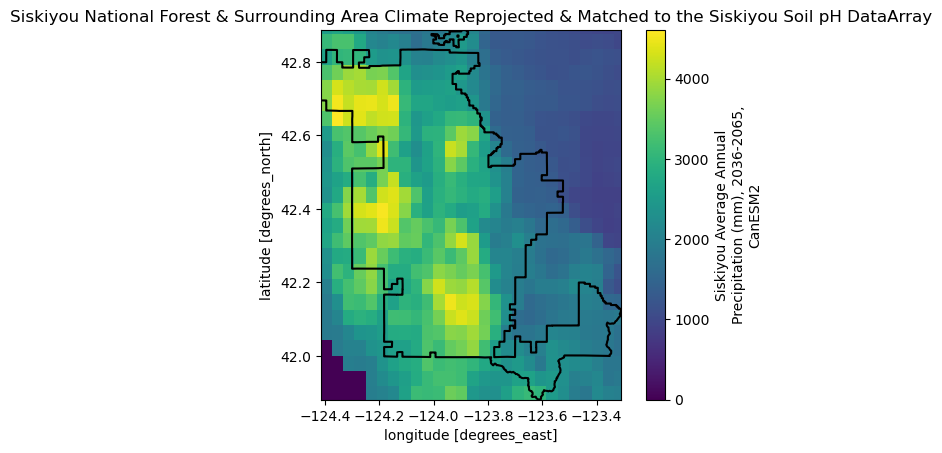

In [11]:
# plot reprojected Siskiyou Average Annual Precipitation (mm), 2036-2065, CanESM2
reproj_ave_annual_pr_das[0].plot()

# Plot Siskiyou National Forest boundary on reproj_ave_annual_pr_das[0] plot
siskiyou_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Siskiyou National Forest & Surrounding Area Climate Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()

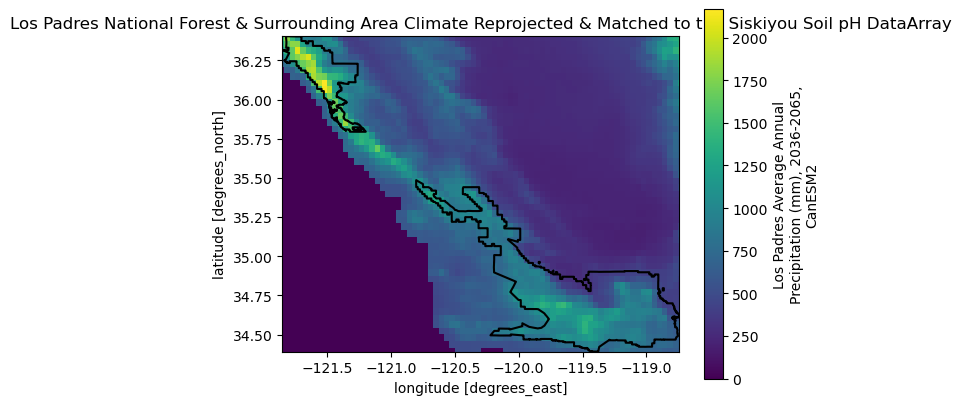

In [12]:
# plot reprojected Los Padres Average Annual Precipitation (mm), 2036-2065, CanESM2
reproj_ave_annual_pr_das[8].plot()

# Plot Los Padres National Forest boundary on reproj_ave_annual_pr_das[8] plot
padres_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Los Padres National Forest & Surrounding Area Climate Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()

<span style='color: purple'>

Store reprojected DataArrays:

</span>

In [13]:
%store siskiyou_elev_reproj_da padres_elev_reproj_da reproj_ave_annual_pr_das

Stored 'siskiyou_elev_reproj_da' (DataArray)
Stored 'padres_elev_reproj_da' (DataArray)
Stored 'reproj_ave_annual_pr_das' (list)
